# Data Visualization for MediumImageNet Dataset
A simple visualizer to display examples from the MediumImageNet dataset along with their class names.

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from torchvision.utils import make_grid
import os
from PIL import Image

# Load the Dataset

In [4]:
# Path to the HDF5 dataset and class names file
# Updated path to match the actual location on honeydew
DATA_DIR = '/honey/nmep'
HDF5_PATH = os.path.join(DATA_DIR, 'medium-imagenet-96.hdf5')  # Updated filename

# Try to find class names file
CLASS_NAMES_PATH = os.path.join(DATA_DIR, 'class_names.txt')

# If the class_names.txt is not available, you can try these alternatives
if not os.path.exists(CLASS_NAMES_PATH):
    CLASS_NAMES_PATH = os.path.join(DATA_DIR, 'classnames.txt')
    if not os.path.exists(CLASS_NAMES_PATH):
        CLASS_NAMES_PATH = os.path.join(DATA_DIR, 'classes.txt')

# Load class names
try:
    with open(CLASS_NAMES_PATH, 'r') as f:
        class_names = [line.strip() for line in f.readlines()]
    print(f"Loaded {len(class_names)} class names")
    print(f"First 5 classes: {class_names[:5]}")
except FileNotFoundError:
    print(f"Class names file not found at {CLASS_NAMES_PATH}")
    # Try looking for class names in alternative locations
    try:
        alt_path = '/data/medium-imagenet/class_names.txt'
        with open(alt_path, 'r') as f:
            class_names = [line.strip() for line in f.readlines()]
        print(f"Loaded {len(class_names)} class names from {alt_path}")
    except FileNotFoundError:
        print("Falling back to generic class names")
        class_names = [f"Class_{i}" for i in range(200)]  # Fallback to generic names

# Open the HDF5 file
try:
    h5_file = h5py.File(HDF5_PATH, 'r')
    print(f"Successfully opened HDF5 file: {HDF5_PATH}")
    print(f"Available keys: {list(h5_file.keys())}")
except FileNotFoundError:
    print(f"HDF5 file not found at {HDF5_PATH}")
    print("Please check the path and make sure the file exists.")
    # You can try alternative paths here if needed

Class names file not found at /honey/nmep/classes.txt
Falling back to generic class names
Successfully opened HDF5 file: /honey/nmep/medium-imagenet-96.hdf5
Available keys: ['images-test', 'images-train', 'images-val', 'labels-train', 'labels-val']


# Explore Dataset Structure

In [3]:
# Function to recursively explore HDF5 structure
def explore_h5_structure(item, indent=0):
    if isinstance(item, h5py.Group):
        print(' ' * indent + f"Group: {item.name}")
        for key in item.keys():
            explore_h5_structure(item[key], indent + 4)
    elif isinstance(item, h5py.Dataset):
        print(' ' * indent + f"Dataset: {item.name}, Shape: {item.shape}, Dtype: {item.dtype}")

print("HDF5 File Structure:")
explore_h5_structure(h5_file)

HDF5 File Structure:
Group: /
    Dataset: /images-test, Shape: (75929, 3, 96, 96), Dtype: uint8
    Dataset: /images-train, Shape: (607425, 3, 96, 96), Dtype: uint8
    Dataset: /images-val, Shape: (75928, 3, 96, 96), Dtype: uint8
    Dataset: /labels-train, Shape: (607425,), Dtype: uint8
    Dataset: /labels-val, Shape: (75928,), Dtype: uint8


# Visualize Training Examples

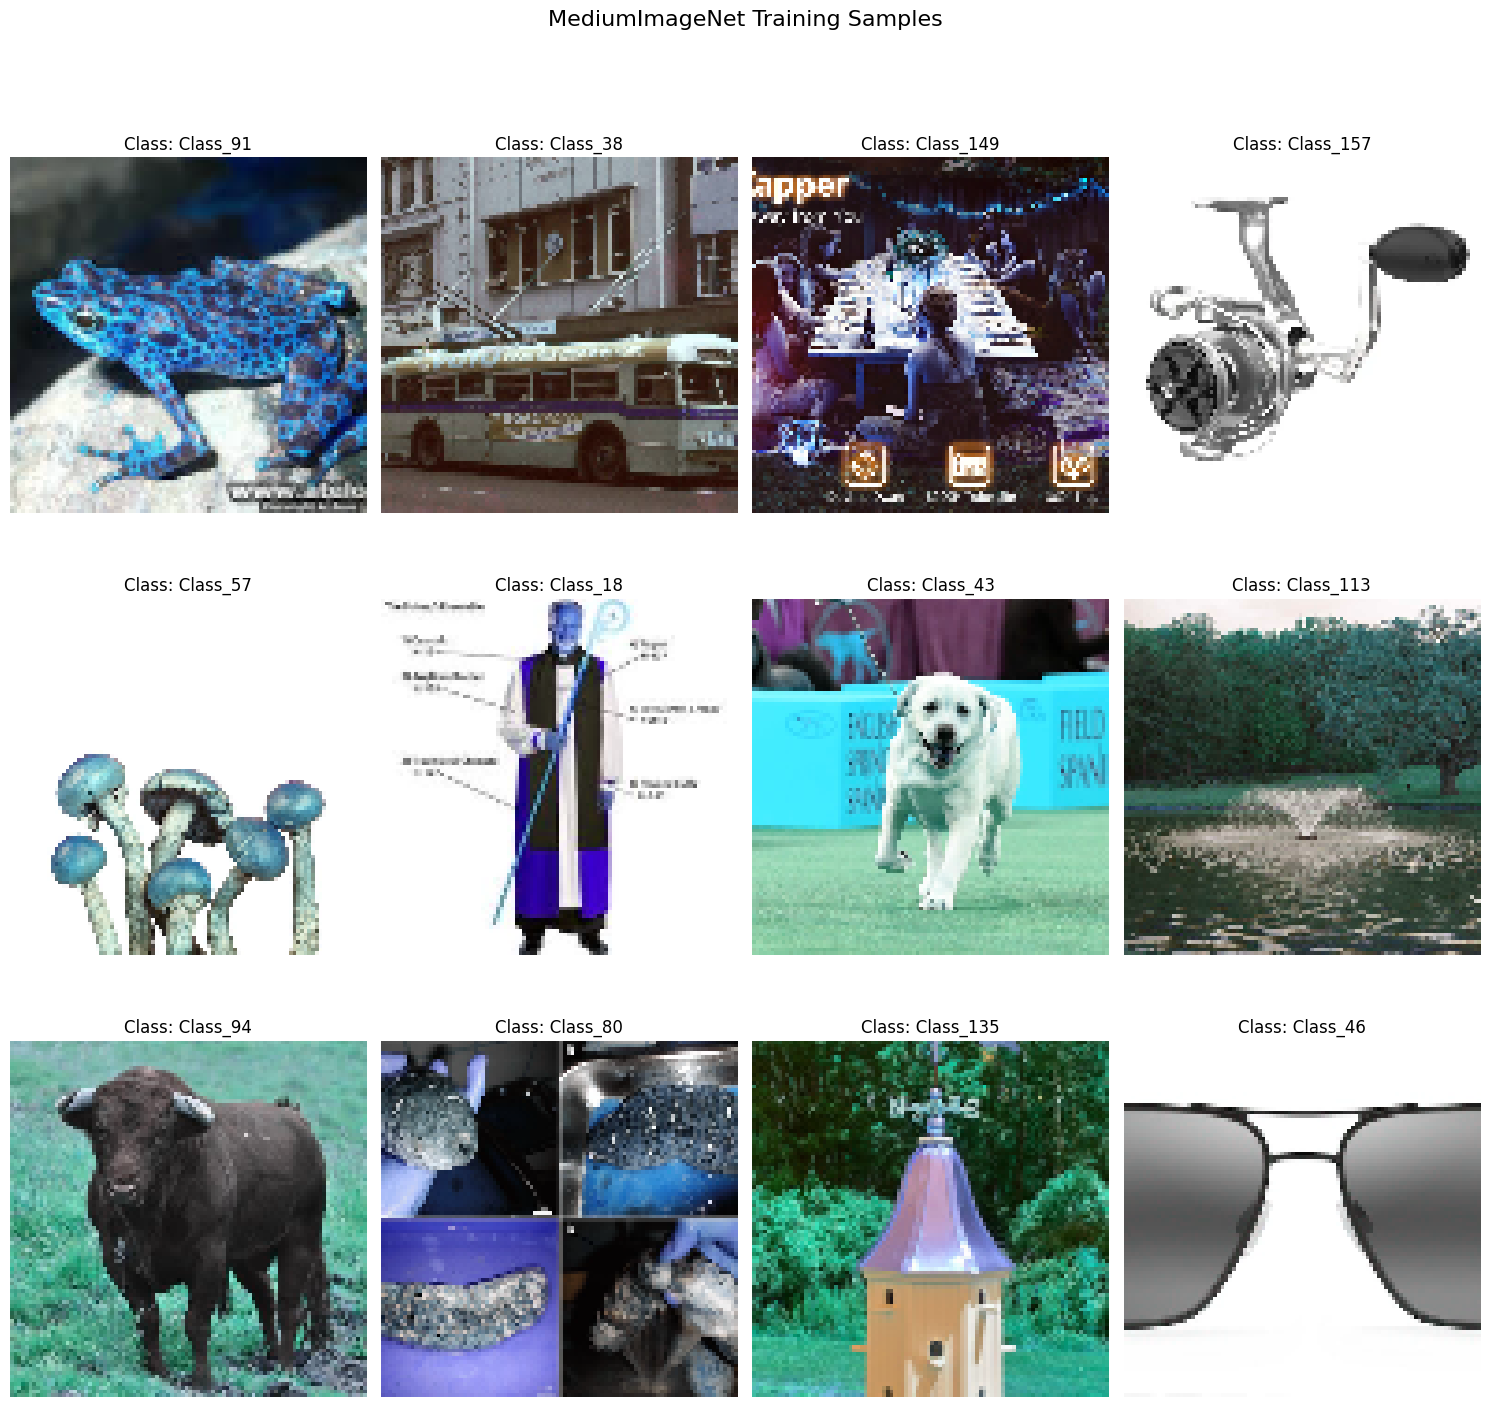

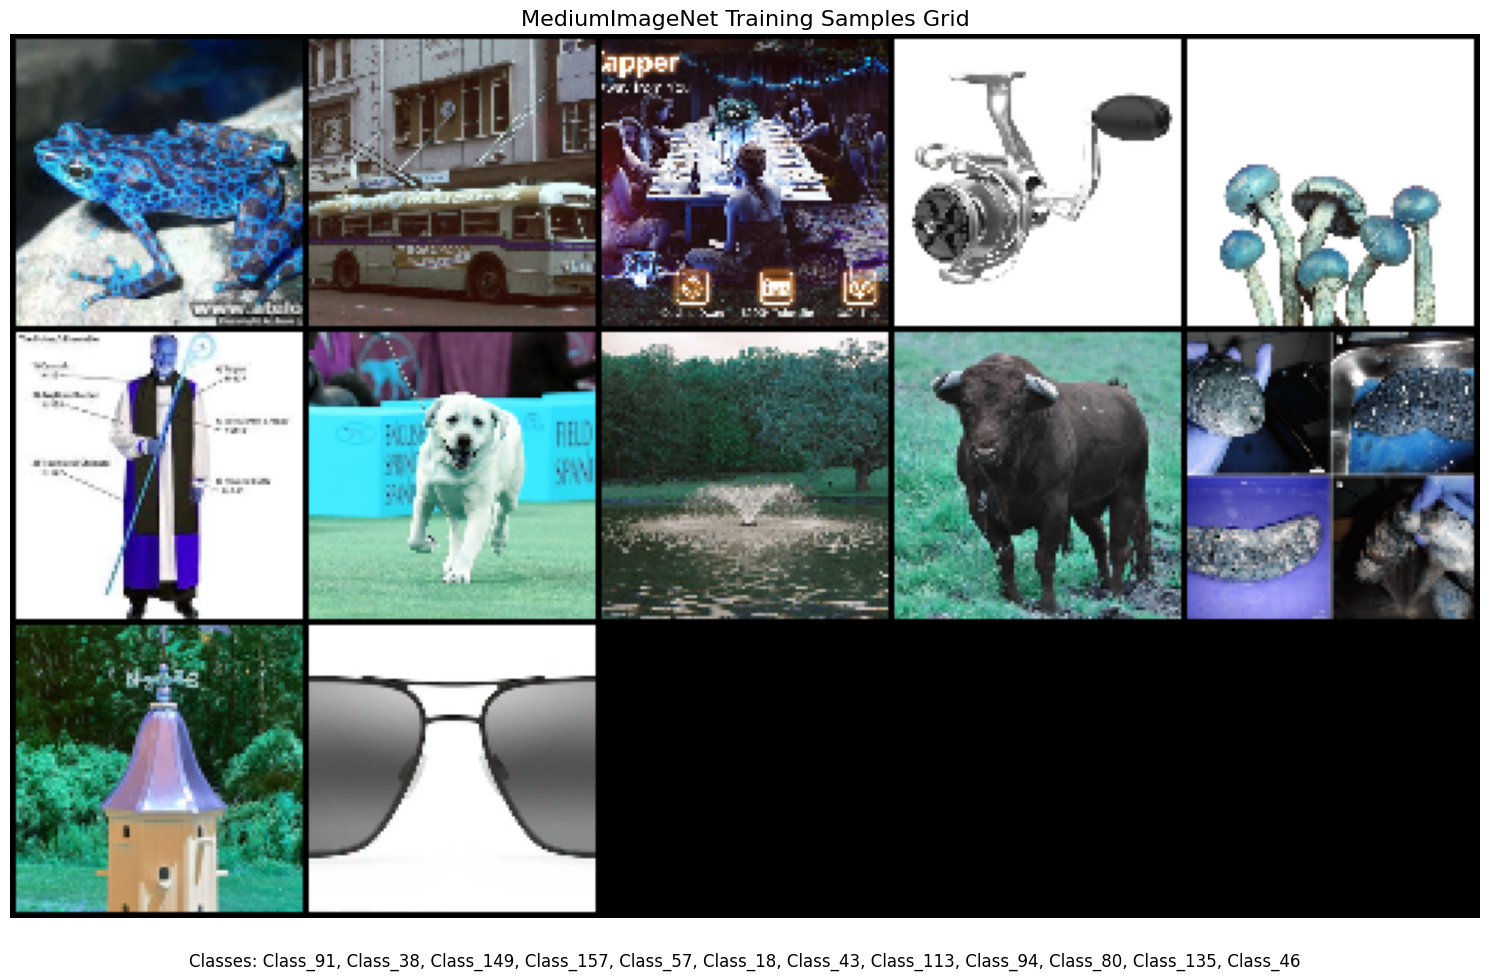

In [6]:
# Function to display a grid of images with their class names
def display_images(images, labels, num_images=10, title="Dataset Samples"):
    plt.figure(figsize=(15, 15))
    for i in range(min(num_images, len(images))):
        plt.subplot(int(np.ceil(num_images/4)), 4, i+1)
        plt.imshow(images[i])
        plt.title(f"Class: {class_names[labels[i]]}")
        plt.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Function to display a grid of images using torchvision's make_grid
def display_image_grid(images, labels, num_images=10, title="Dataset Samples Grid"):
    # Convert images to torch tensors and normalize
    tensor_images = [torch.from_numpy(img.transpose(2, 0, 1)).float() / 255.0 for img in images[:num_images]]
    grid = make_grid(tensor_images, nrow=5, padding=2)
    
    # Convert grid back to numpy for display
    grid_np = grid.numpy().transpose(1, 2, 0)
    
    plt.figure(figsize=(15, 10))
    plt.imshow(grid_np)
    plt.title(title, fontsize=16)
    plt.axis('off')
    
    # Add class names below the image
    class_text = ", ".join([class_names[labels[i]] for i in range(min(num_images, len(labels)))])
    plt.figtext(0.5, 0.01, f"Classes: {class_text}", wrap=True, horizontalalignment='center', fontsize=12)
    
    plt.tight_layout()
    plt.show()

# Visualize training samples
try:
    # Access train data and labels
    images_train = h5_file['images-train']
    labels_train = h5_file['labels-train']
    
    # Sample random indices
    num_samples = 12
    sample_indices = np.random.choice(len(labels_train), num_samples, replace=False)
    
    # Get the sampled images and labels
    sample_images = [np.transpose(images_train[i], (1, 2, 0)) for i in sample_indices]
    sample_labels = [labels_train[i] for i in sample_indices]
    
    # Display individual images
    display_images(sample_images, sample_labels, num_samples, "MediumImageNet Training Samples")
    
    # Display as a grid
    display_image_grid(sample_images, sample_labels, num_samples, "MediumImageNet Training Samples Grid")
    
except KeyError as e:
    print(f"Error accessing dataset: {e}")
    print("The HDF5 file structure might be different than expected.")
    print(f"Available keys: {list(h5_file.keys())}")

# Visualize Validation Examples

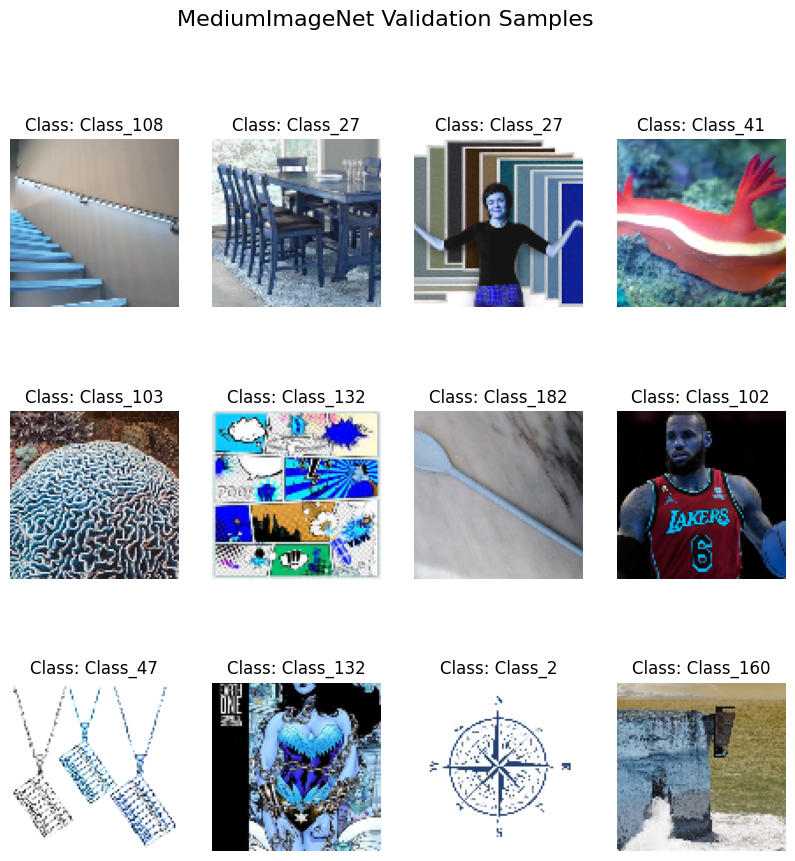

In [11]:
# Visualize validation samples
try:
    # Access validation data and labels
    images_val = h5_file['images-val']
    labels_val = h5_file['labels-val']
    
    # Sample random indices
    num_samples = 12
    sample_indices = np.random.choice(len(labels_val), num_samples, replace=False)
    
    # Get the sampled images and labels
    sample_images = [images_val[i] for i in sample_indices]
    sample_labels = [labels_val[i] for i in sample_indices]

    def display_images(images, labels, num_images, title):
        plt.figure(figsize=(10, 10))
        plt.suptitle(title, fontsize=16)
        
        for i in range(min(num_images, len(images))):
            plt.subplot(int(np.ceil(num_images / 4)), 4, i + 1)
            plt.imshow(images[i].transpose(1, 2, 0))  # Fix shape issue
            plt.title(f"Class: {class_names[labels[i]]}")
            plt.axis('off')
    
        plt.show()
        
    # Display individual images
    display_images(sample_images, sample_labels, num_samples, "MediumImageNet Validation Samples")
    
except KeyError as e:
    print(f"Error accessing validation dataset: {e}")
    print("The validation set might be structured differently or not available.")

# Class Distribution

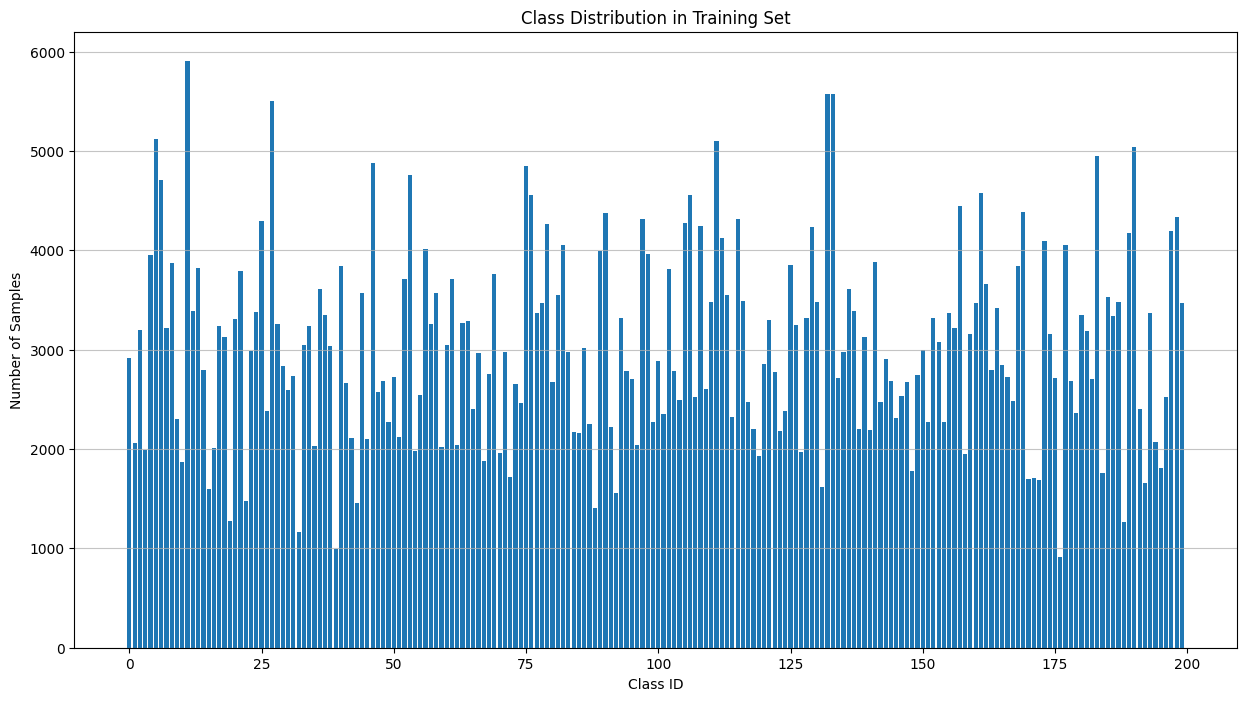

Total number of classes: 200
Average samples per class: 3037.12
Min samples in a class: 910
Max samples in a class: 5904


In [13]:
try:
    # Count occurrences of each class
    labels_train_array = np.array(labels_train)
    unique_classes, class_counts = np.unique(labels_train_array, return_counts=True)
    
    # Plot class distribution
    plt.figure(figsize=(15, 8))
    plt.bar(unique_classes, class_counts)
    plt.xlabel('Class ID')
    plt.ylabel('Number of Samples')
    plt.title('Class Distribution in Training Set')
    plt.grid(axis='y', alpha=0.75)
    plt.show()
    
    # Print some statistics
    print(f"Total number of classes: {len(unique_classes)}")
    print(f"Average samples per class: {np.mean(class_counts):.2f}")
    print(f"Min samples in a class: {np.min(class_counts)}")
    print(f"Max samples in a class: {np.max(class_counts)}")
    
except Exception as e:
    print(f"Error analyzing class distribution: {e}")

# Clean Up

In [14]:
# Close the HDF5 file
h5_file.close()
print("HDF5 file closed.")

HDF5 file closed.
